**IMPORTANT NOTES** 
- Please complete the code between the two comments: `## START CODE HERE` and `## END CODE HERE`. 
- Be sure to run the codes in order.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
seed= 1
np.random.seed(seed)

# Outline
- [1 -Binary Logistic Regression](#1)

<a name="1"></a>
## 1 - Logistic Regression

(500, 2)


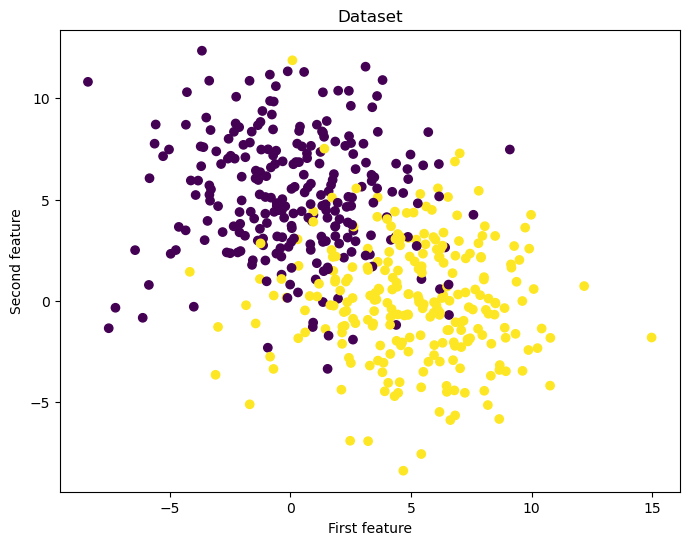

In [2]:
X, y = make_blobs(n_samples=500, centers= [(0, 5), (5, 0)], cluster_std=3, random_state=seed)
y = y.reshape(-1, 1)
print(X.shape)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

Divide the data, using 80% for training and 20% for testing.

In [3]:
## START CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
## END CODE HERE
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (400, 2)
Shape y_train: (400, 1)
Shape X_test: (100, 2)
Shape y_test: (100, 1)


Logistic regression is a foundational method widely used for modeling the relationship between a binary or categorical dependent variable and one or more independent variables. It is particularly well-suited for classification tasks, where the objective is to predict a discrete outcome, often represented as class labels (e.g., 0 or 1).

Here we'll focus on logistic regression for binary classification. In logistic regression, the model estimates the probability that an instance belongs to a particular class. This estimation is achieved by applying the logistic function, also known as the sigmoid function, to the linear combination of the independent variables ($w \cdot x + b$). The logistic regression equation can be expressed as:

$$ f_{\mathbf{w},b}(x) = \boldsymbol{\hat{y}} = \sigma(\mathbf{w}\cdot \mathbf{x} + b) $$
where function $\sigma$ is the Sigmoid function. The sigmoid function is defined as:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In this equation:
- $x$: The independent variable
- $w$: the coefficient or weights which signifies the influence of an independent variable on the dependent variable 
- $b$: The intercept or bias  

The primary objective of logistic regression is to identify the optimal values of $w$ and $b$ that align best with the data. This optimization process typically involves maximizing the likelihood of the observed data or minimizing a chosen cost function, such as the log-likelihood or cross-entropy loss. Commonly employed optimization techniques include gradient descent.
Cross-entropy cost funcntion is as follows:
$$J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m [ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$$
We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in this equation.

Might be suprising but if you do the derivation from calculus, you'll find out that the formula for computing partial derivatives of the cost function with respect to each parameter is exqctly like what it was for linear regression:
$$\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})x_{j}^{(i)}$$
$$\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})$$
* m is the number of training examples in the dataset

Yeeeah! but No! Here, in logistic regression the definition of $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is different!

With help of formulas given above and your own knowladge, complete the following code. 
**You are encouraged  to use numpy's built-in functions like: `np.exp`, `np.sum`, `np.argmax` etc.
You may not use scikit-learn's built-in functions to facilitate the following code.**

In [4]:
np.random.seed(seed)
class LogisticRegression:
    def __init__(self):
        pass

    def sigmoid(self, z):
        '''
        Args:
            z: numpy array of shape = (n_samples, 1)
        Returns:
            g: numpy array of shape = (n_samples, 1)
        '''
        ## START CODE HERE
        g = 1 / (1 + np.exp(-z))
        return g
        ## END CODE HERE

    def train(self, X, y, n_iters, lr):
        '''        
        Args:
            X: numpy array of shape = (n_samples, n_features)
            y: numpy array of shape = (n_samples, 1)
            n_iters: number of iterations. scalar
            lr: learning rate. scalar
        Returns:
            w: numpy array of shape = (n_features, 1)
            b: bias. scalar
            costs: list of cost for each iteration
        '''
        n_samples, n_features = X.shape
        ## START CODE HERE
        # Initialize weights and bias to zero values, and ensure you monitor their dimensions.
        self.w = np.zeros((n_features,1))
        self.b = 0
        
        ## END CODE HERE
        costs = []
        for i in range(n_iters):
            ## START CODE HERE
            # Step 1: Compute a linear combination of the input features and weights
            z = np.dot(X, self.w) + self.b
            
            # Step 2: Apply the Sigmoid activation function
            f_wb = self.sigmoid(z)

            # Step 3: Compute the cost            
            cost = -np.sum(y*np.log(f_wb) + (1-y)*np.log(1-f_wb))/ n_samples
            costs.append(cost)
            
            # Step 4: Compute the gradients        
            dj_dw = (1 / n_samples) * np.dot(X.T, (f_wb - y))
            dj_db = (1 / n_samples) * np.sum(f_wb - y)

            # Step 5: Update the parameters
            self.w -= lr * dj_dw
            self.b -= lr * dj_db

            # Also print the cost each 10 iterations
            if i % 10 == 0:
                print(f"cost {i} : {cost}")
            
            ## END CODE HERE
        
        # Returns
        return self.w, self.b, costs

    def predict(self, X):
        '''
        Args:
            X: numpy array of shape = (n_samples, n_features)
        Returns:
            numpy array of shape = (n_samples, 1) with predicted classes.(assume threshhold is 0.5)
        '''
        ## START CODE HERE
        z = np.dot(X, self.w) + self.b
        f_wb = self.sigmoid(z)
        f_wb_classes = (f_wb > 0.5).astype(int)

        return f_wb_classes
        ## END CODE HERE

cost 0 : 0.6931471805599452
cost 10 : 0.6646463591768267
cost 20 : 0.6390510280456765
cost 30 : 0.6160402613421976
cost 40 : 0.5953193058005772
cost 50 : 0.5766220363722028
cost 60 : 0.5597112096019334
cost 70 : 0.5443772582559064
cost 80 : 0.5304362320512609
cost 90 : 0.5177273285786653
cost 100 : 0.5061103138382053
cost 110 : 0.4954630179726795
cost 120 : 0.48567900987087653
cost 130 : 0.4766654993285432
cost 140 : 0.4683414808005377
cost 150 : 0.4606361123940478
cost 160 : 0.45348731284692717
cost 170 : 0.4468405543268124
cost 180 : 0.4406478275887298
cost 190 : 0.4348667567737523
cost 200 : 0.429459842927145
cost 210 : 0.42439381755693634
cost 220 : 0.4196390898905453
cost 230 : 0.41516927372468954
cost 240 : 0.4109607818067565
cost 250 : 0.40699247749662
cost 260 : 0.4032453750320816
cost 270 : 0.39970238107181244
cost 280 : 0.3963480713383326
cost 290 : 0.3931684971545033
cost 300 : 0.3901510174844557
cost 310 : 0.3872841527763731
cost 320 : 0.3845574574802555
cost 330 : 0.381961

cost 4420 : 0.3012732140454368
cost 4430 : 0.3012698125299003
cost 4440 : 0.30126644389604756
cost 4450 : 0.30126310778611587
cost 4460 : 0.301259803846552
cost 4470 : 0.301256531727958
cost 4480 : 0.3012532910850374
cost 4490 : 0.30125008157654287
cost 4500 : 0.30124690286522354
cost 4510 : 0.3012437546177744
cost 4520 : 0.3012406365047853
cost 4530 : 0.30123754820069143
cost 4540 : 0.30123448938372394
cost 4550 : 0.30123145973586163
cost 4560 : 0.30122845894278316
cost 4570 : 0.3012254866938202
cost 4580 : 0.3012225426819107
cost 4590 : 0.3012196266035533
cost 4600 : 0.30121673815876226
cost 4610 : 0.301213877051023
cost 4620 : 0.3012110429872482
cost 4630 : 0.30120823567773447
cost 4640 : 0.3012054548361199
cost 4650 : 0.3012027001793418
cost 4660 : 0.30119997142759564
cost 4670 : 0.3011972683042937
cost 4680 : 0.301194590536025
cost 4690 : 0.30119193785251563
cost 4700 : 0.30118930998658927
cost 4710 : 0.30118670667412883
cost 4720 : 0.30118412765403835
cost 4730 : 0.30118157266820

cost 8860 : 0.30086858704774716
cost 8870 : 0.30086836895849955
cost 8880 : 0.30086815138990436
cost 8890 : 0.30086793433814407
cost 8900 : 0.30086771779943683
cost 8910 : 0.30086750177003585
cost 8920 : 0.30086728624622894
cost 8930 : 0.3008670712243384
cost 8940 : 0.3008668567007208
cost 8950 : 0.3008666426717662
cost 8960 : 0.30086642913389816
cost 8970 : 0.3008662160835736
cost 8980 : 0.3008660035172819
cost 8990 : 0.3008657914315451
cost 9000 : 0.3008655798229175
cost 9010 : 0.300865368687985
cost 9020 : 0.30086515802336533
cost 9030 : 0.3008649478257073
cost 9040 : 0.3008647380916906
cost 9050 : 0.300864528818026
cost 9060 : 0.30086432000145424
cost 9070 : 0.3008641116387461
cost 9080 : 0.30086390372670246
cost 9090 : 0.3008636962621536
cost 9100 : 0.30086348924195877
cost 9110 : 0.3008632826630065
cost 9120 : 0.3008630765222138
cost 9130 : 0.300862870816526
cost 9140 : 0.30086266554291685
cost 9150 : 0.3008624606983876
cost 9160 : 0.30086225627996743
cost 9170 : 0.30086205228471

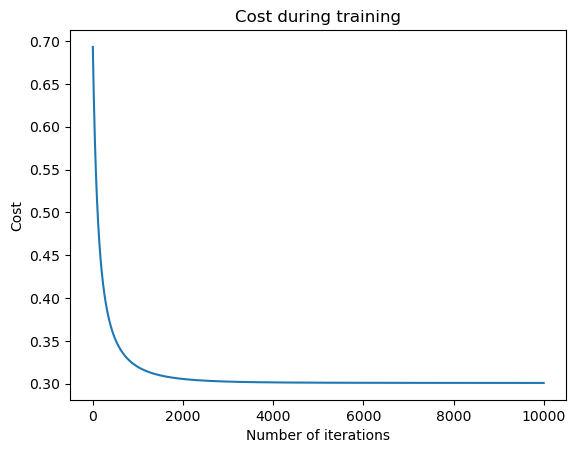

In [6]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=10000, lr=0.001) # choose learning rate and number of iterations, you think is best.

plt.plot(np.arange(len(costs)), costs)
plt.title("Cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [83]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'y_test': y_test.squeeze(), 'y_pred': y_pred.squeeze()})
df

,y_test,y_pred
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
95,1,1
96,0,0
97,1,1
98,1,1


### Evaluation Metrics
These are some metrics for classification tasks provide insights into a model's ability to correctly classify instances into different classes:
- true positive (TP): The model classifies the example as positive, and the actual label also positive.
- false positive (FP): The model classifies the example as positive, but the actual label is negative.
- true negative (TN): The model classifies the example as negative, and the actual label is also negative.
- false negative (FN): The model classifies the example as negative, but the label is actually positive.  

- **Accuracy**: Measures the proportion of correct predictions.
  $$accuracy = \frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{true negatives} + \text{false positives} + \text{false negatives}}$$

- **Precision**: Quantifies the accuracy of positive predictions.
  $$precision = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$

- **Recall**: Evaluates the model's capability to capture all positive instances.
  $$recall = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$

- **F1 Score**: A composite metric that balances precision and recall.
  $$F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

In [84]:
def compute_binary_classification_eval_metrics(y_true, y_pred):
    # START CODE HERE
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    # END CODE HERE

    print(f"Accuracy: {accuracy}")
    print(f"True Positives (tp): {tp}")
    print(f"True Negatives (tn): {tn}")
    print(f"False Positives (fp): {fp}")
    print(f"False Negatives (fn): {fn}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
compute_binary_classification_eval_metrics(y_test, y_pred)

Accuracy: 0.94
True Positives (tp): 48
True Negatives (tn): 46
False Positives (fp): 2
False Negatives (fn): 4
Precision: 0.96
Recall: 0.9230769230769231
F1 Score: 0.9411764705882353
